# `fast-xbrl-parser`

**Created by:** [Ties de Kok](https://github.com/TiesdeKok)   
**Github repository:** [`fast_xbrl_parser`](https://github.com/TiesdeKok/fast_xbrl_parser)   
**Last updated:** January 2022

## Imports

In [1]:
import os, json
import pandas as pd
import numpy as np

import fast_xbrl_parser as fxp

In [2]:
import pprint
pp = pprint.PrettyPrinter()

----

# Use as a python package
----

The `fast-xbrl-parser` package takes either an SEC Edgar or a local path to the XML file as input.   
The parser will automatically detect which method to use based on your input.

**Note:** the url or path has to directly point at the XML file you are looking to parse.

For example: 

- https://www.sec.gov/Archives/edgar/data/1326380/000132638021000129/gme-20211030_htm.xml will work
- https://www.sec.gov/Archives/edgar/data/1326380/000132638021000129/0001326380-21-000129-index.htm does **not** work

----
----
## Load from SEC Edgar URL

In [3]:
edgar_url = "https://www.sec.gov/Archives/edgar/data/1326380/000132638021000129/gme-20211030_htm.xml"

xbrl_dict = fxp.parse(
    edgar_url, 
    output=['json', 'facts', 'dimensions'],   ### You can adjust this to only return certain outputs. 
    email = "demo@fast-xbrl-parser.com"       ### Adjust this to reflect your email address. This is required by the SEC Edgar system. 
) 

### Inspect the result  

The `fxp.parse()` function will return a dictionary with at most four keys:

-----
**`info`** contains the basic meta data associated with the filing. 

In [4]:
pp.pprint(xbrl_dict['info'])

{'accession_number': '000132638021000129',
 'cik': '0001326380',
 'input_type': 'Remote',
 'raw_input': 'https://www.sec.gov/Archives/edgar/data/1326380/000132638021000129/gme-20211030_htm.xml',
 'xml_name': 'gme-20211030_htm'}


----
**`json`** returns a list of Python dictionaries that is easily exported to a JSON file (if need be). 

You can export it to a json file using:

```python
with open('filename.json', 'w') as f:
    json.dump(xbrl_dict['json'], f)
```

In [5]:
pp.pprint(xbrl_dict['json'][500:501])

[{'context_ref': 'ie27f0ad36fbf4c8fb4642e21440fbdb1_I20211030',
  'decimals': '-5',
  'dimensions': [{'key_ns': 'us-gaap',
                  'key_value': 'DebtInstrumentAxis',
                  'member_ns': 'gme',
                  'member_value': 'SeniorNotes1000Due2023Member'},
                 {'key_ns': 'us-gaap',
                  'key_value': 'LongtermDebtTypeAxis',
                  'member_ns': 'us-gaap',
                  'member_value': 'SeniorNotesMember'}],
  'id': 'id3VybDovL2RvY3MudjEvZG9jOjUzYmQ2ZjI2MzlhMDQ4NjFiYWIwZTVhM2Q2OWFhZjUzL3NlYzo1M2JkNmYyNjM5YTA0ODYxYmFiMGU1YTNkNjlhYWY1M181NS9mcmFnOjA2OGYxNzQ0MDQ5MDRlM2VhYzkwNzI2MjZlYjdlNWQ3L3RhYmxlOjk2ZmZlODI1MTNkYzQxYjA5YTEzYTBiMzJlNGM2OTFmL3RhYmxlcmFuZ2U6OTZmZmU4MjUxM2RjNDFiMDlhMTNhMGIzMmU0YzY5MWZfNS0xLTEtMS0yMDg5OQ_5d7d4fe7-7655-4e69-a494-871e115fa40a',
  'name': 'DebtInstrumentCarryingAmount',
  'periods': [{'period_type': 'instant', 'period_value': '2021-10-30'}],
  'prefix': 'us-gaap',
  'unit_ref': 'usd',
  'units': [{'u

-----
**`facts`** returns a list of Python dictionaries that is easily converted into a Python dictionary or CSV file

Note, the primary difference between `json` and `facts` is that the `facts` data does not include the dimensions to make it compatible with a tabular format.

In [6]:
pp.pprint(xbrl_dict['facts'][500:501])

[{'accession_number': '000132638021000129',
  'cik': '0001326380',
  'context_ref': 'ie27f0ad36fbf4c8fb4642e21440fbdb1_I20211030',
  'num_dim': 2,
  'period_end': None,
  'period_start': None,
  'point_in_time': '2021-10-30',
  'prefix': 'us-gaap',
  'tag': 'DebtInstrumentCarryingAmount',
  'unit': 'unit -- iso4217:USD',
  'value': '0',
  'xml_name': 'gme-20211030_htm'}]


In [7]:
## It converts straight into a Pandas dataframe
facts_df = pd.DataFrame(xbrl_dict['facts'])
facts_df.head(4)

,cik,accession_number,xml_name,context_ref,tag,value,prefix,period_start,period_end,point_in_time,unit,num_dim
0,0001326380,000132638021000129,gme-20211030_htm,ibaf9b114da2b46d9a3c3baeec901b547_D20210131-20...,AmendmentFlag,false,dei,2021-01-31,2021-10-30,None,None,0
1,0001326380,000132638021000129,gme-20211030_htm,ibaf9b114da2b46d9a3c3baeec901b547_D20210131-20...,DocumentFiscalYearFocus,2021,dei,2021-01-31,2021-10-30,None,None,0
2,0001326380,000132638021000129,gme-20211030_htm,ibaf9b114da2b46d9a3c3baeec901b547_D20210131-20...,DocumentFiscalPeriodFocus,Q3,dei,2021-01-31,2021-10-30,None,None,0
3,0001326380,000132638021000129,gme-20211030_htm,ibaf9b114da2b46d9a3c3baeec901b547_D20210131-20...,EntityCentralIndexKey,0001326380,dei,2021-01-31,2021-10-30,None,None,0


-----
**`dimensions`** returns a list of Python dictionaries containing the dimensions. It is designed to be converted to a Pandas DataFrame and CSV/Excel file.

In [8]:
pp.pprint(xbrl_dict['dimensions'][100:101])

[{'accession_number': '000132638021000129',
  'axis_prefix': 'us-gaap',
  'axis_tag': 'FairValueByFairValueHierarchyLevelAxis',
  'cik': '0001326380',
  'context_ref': 'id3a13c29bf2d4ea6a3d39260eac407f4_I20210130',
  'member_prefix': 'us-gaap',
  'member_tag': 'FairValueInputsLevel2Member',
  'xml_name': 'gme-20211030_htm'}]


In [9]:
## It converts straight into a Pandas dataframe
dimensions_df = pd.DataFrame(xbrl_dict['dimensions'])
dimensions_df = dimensions_df.drop_duplicates() ## <--- Temporary, will be fixed in a future version
dimensions_df.head(2)

,cik,accession_number,xml_name,context_ref,axis_prefix,axis_tag,member_prefix,member_tag
0,0001326380,000132638021000129,gme-20211030_htm,ia25aa9ac961c41a193eef5ff8358ee75_I20210130,us-gaap,StatementEquityComponentsAxis,us-gaap,CommonStockMember
2,0001326380,000132638021000129,gme-20211030_htm,i847f9af0c3e54b078102df606a9f64aa_I20210130,us-gaap,StatementEquityComponentsAxis,us-gaap,AdditionalPaidInCapitalMember


In [10]:
## The facts and dimensions tables can be merged together using the context_ref and xml_name
combo_df = pd.merge(
    facts_df, 
    dimensions_df.drop(['cik', 'accession_number'], axis=1),
    on=['context_ref', 'xml_name'], 
    how='left'
)

## Note, multiple facts might use the same context_ref, see below: 
combo_df[combo_df.context_ref == 'i12efa46789384fd39ac941da8b7b0f1a_D20200202-20201031']

,cik,accession_number,xml_name,context_ref,tag,value,prefix,period_start,period_end,point_in_time,unit,num_dim,axis_prefix,axis_tag,member_prefix,member_tag
403,0001326380,000132638021000129,gme-20211030_htm,i12efa46789384fd39ac941da8b7b0f1a_D20200202-20...,DisposalGroupIncludingDiscontinuedOperationGen...,1200000,us-gaap,2020-02-02,2020-10-31,None,unit -- iso4217:USD,2,us-gaap,DisposalGroupClassificationAxis,us-gaap,DiscontinuedOperationsDisposedOfBySaleMember
404,0001326380,000132638021000129,gme-20211030_htm,i12efa46789384fd39ac941da8b7b0f1a_D20200202-20...,DisposalGroupIncludingDiscontinuedOperationGen...,1200000,us-gaap,2020-02-02,2020-10-31,None,unit -- iso4217:USD,2,us-gaap,IncomeStatementBalanceSheetAndAdditionalDisclo...,gme,SpringMobileMember
405,0001326380,000132638021000129,gme-20211030_htm,i12efa46789384fd39ac941da8b7b0f1a_D20200202-20...,DiscontinuedOperationTaxEffectOfDiscontinuedOp...,-300000,us-gaap,2020-02-02,2020-10-31,None,unit -- iso4217:USD,2,us-gaap,DisposalGroupClassificationAxis,us-gaap,DiscontinuedOperationsDisposedOfBySaleMember
406,0001326380,000132638021000129,gme-20211030_htm,i12efa46789384fd39ac941da8b7b0f1a_D20200202-20...,DiscontinuedOperationTaxEffectOfDiscontinuedOp...,-300000,us-gaap,2020-02-02,2020-10-31,None,unit -- iso4217:USD,2,us-gaap,IncomeStatementBalanceSheetAndAdditionalDisclo...,gme,SpringMobileMember


----
----
## Load from local XML file  

Notes:

- When loading a local XML file it is not nescessary to include the `email` parameter
- The output is the same as with an SEC Edgar URL, however, metadata (such as the CIK identifier) are not included. 

In [11]:
xml_path = "gme-20211030_htm.xml"
xbrl_dict = fxp.parse(
    xml_path, 
    output=['json', 'facts', 'dimensions']
)

The outputs are the same as above, except for the identifier information, for example:

In [12]:
pp.pprint(xbrl_dict['info'])

{'accession_number': None,
 'cik': None,
 'input_type': 'Local',
 'raw_input': 'gme-20211030_htm.xml',
 'xml_name': 'gme-20211030_htm'}


In [13]:
pd.DataFrame(xbrl_dict['facts']).head(2)

,cik,accession_number,xml_name,context_ref,tag,value,prefix,period_start,period_end,point_in_time,unit,num_dim
0,None,None,gme-20211030_htm,ibaf9b114da2b46d9a3c3baeec901b547_D20210131-20...,AmendmentFlag,false,dei,2021-01-31,2021-10-30,None,None,0
1,None,None,gme-20211030_htm,ibaf9b114da2b46d9a3c3baeec901b547_D20210131-20...,DocumentFiscalYearFocus,2021,dei,2021-01-31,2021-10-30,None,None,0


----

# Use as a command line application
----

The `fast-xbrl-parser` CLI tool takes either an SEC Edgar or a local path to the XML file as input.   
The parser will automatically detect which method to use based on your input.

**Note:** the url or path has to directly point at the XML file you are looking to parse.

For example: 

- https://www.sec.gov/Archives/edgar/data/1326380/000132638021000129/gme-20211030_htm.xml will work
- https://www.sec.gov/Archives/edgar/data/1326380/000132638021000129/0001326380-21-000129-index.htm does **not** work

### Parameters:

- `--input` URL or local path to XML file.    
- `--json` Whether to parse and store a JSON file with the fact and dimension data.    
- `--facts` Whether to parse and store a CSV file with the facts data. 
- `--dimensions` Whether to parse and store a CSV file with the dimensions data.       
- `--save-dir` The location to store the files.   
- `--email` The email address to use when using an SEC Edgar URL.   

### Things to note:

- The CSV files are comma delimited and use 2x double qoutes as a qualifier. They open natively in Excel.   
- The file name of the JSON and CSV files is the same as the filename of the XML input file.   

**Small workaround to get the binary to work on Binder:**  

This is not not required on your own computer (probably).

In [14]:
from pathlib import Path
p = Path('./fast_xbrl_parser')
p.chmod(0o777)

----
----
## Load from SEC Edgar URL

In [15]:
store_path = os.getcwd() + '/output'
url_cmd = r"""
"./fast_xbrl_parser"
--input "https://www.sec.gov/Archives/edgar/data/1589526/000158952621000140/blbd-20211002_htm.xml" 
--json --facts --dimensions 
--save-dir "{}" --email "demo@fast-xbrl-parser.com"
""".format(store_path).replace("\n", " ").strip()

In [16]:
return_value = os.popen(url_cmd).read()
pp.pprint(return_value)

('InputDetails { raw_input: '
 '"https://www.sec.gov/Archives/edgar/data/1589526/000158952621000140/blbd-20211002_htm.xml", '
 'xml_name: "blbd-20211002_htm", input_type: Remote, cik: Some("0001589526"), '
 'accession_number: Some("000158952621000140") }\n')


In [17]:
os.listdir(store_path)

['facts_blbd-20211002_htm.csv',
 'blbd-20211002_htm.json',
 'dimensions_blbd-20211002_htm.csv']

The above command creates the following three files:

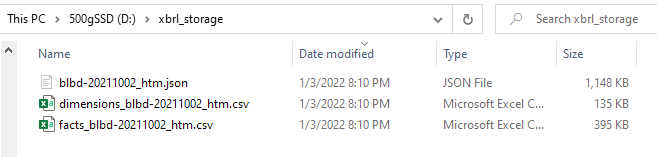

----
----
## Load from local XML file  

Notes:

- When loading a local XML file it is not nescessary to include the `email` parameter
- The output is the same as with an SEC Edgar URL, however, metadata (such as the CIK identifier) are not included.   

Output are the same as above.

In [18]:
store_path = os.getcwd() + '/output'
xml_cmd = r"""
./fast_xbrl_parser 
--input "gme-20211030_htm.xml"
--json --facts --dimensions 
--save-dir "{}"
""".format(store_path).replace("\n", " ").strip()

In [19]:
return_value = os.popen(xml_cmd).read()

In [20]:
pp.pprint(return_value)

('InputDetails { raw_input: "gme-20211030_htm.xml", xml_name: '
 '"gme-20211030_htm", input_type: Local, cik: None, accession_number: None }\n')
